In [3]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

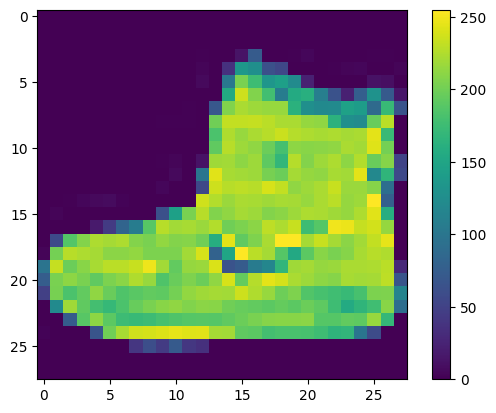

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

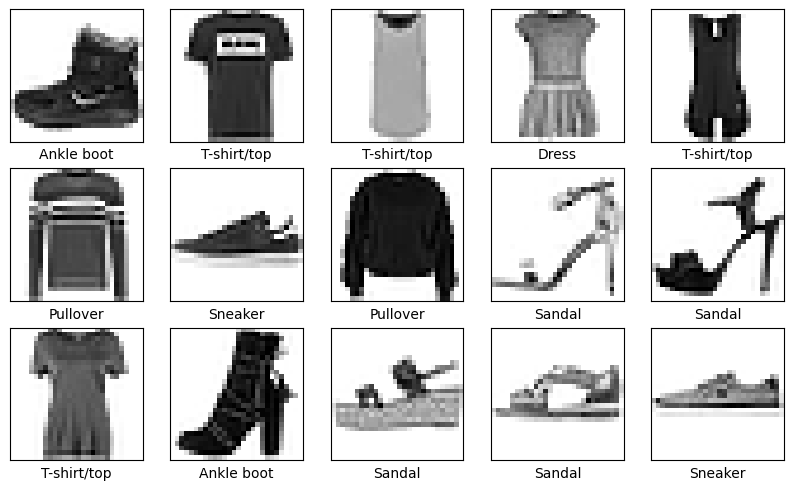

In [13]:
plt.figure(figsize=(10,10))
for i in range(15):#primeros 15 imagenes
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [33]:
#cambios en modelo para ver si mejora (puse arriba el codigo porque como no mejoraba para que no afectara la secuencia del codigo)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),  # Cambio en el número de neuronas
    keras.layers.Dropout(0.5),  # Agregar Dropout para regularización
    keras.layers.Dense(128, activation='relu'),  # Capa oculta adicional
    keras.layers.Dense(10, activation='softmax')
])

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(train_images, train_labels, epochs=15, batch_size=64)  # Cambio en el tamaño del lote

Epoch 1/15
938/938 [==============================] - 10s 10ms/step - loss: 0.6029 - accuracy: 0.7830
Epoch 2/15
938/938 [==============================] - 7s 7ms/step - loss: 0.4574 - accuracy: 0.8326
Epoch 3/15
938/938 [==============================] - 8s 9ms/step - loss: 0.4220 - accuracy: 0.8450
Epoch 4/15
938/938 [==============================] - 7s 7ms/step - loss: 0.4007 - accuracy: 0.8531
Epoch 5/15
938/938 [==============================] - 8s 8ms/step - loss: 0.3851 - accuracy: 0.8571
Epoch 6/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3734 - accuracy: 0.8625
Epoch 7/15
938/938 [==============================] - 8s 9ms/step - loss: 0.3577 - accuracy: 0.8665
Epoch 8/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3523 - accuracy: 0.8692
Epoch 9/15
938/938 [==============================] - 8s 9ms/step - loss: 0.3431 - accuracy: 0.8721
Epoch 10/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3370 - accuracy: 0.87

In [36]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3312 - accuracy: 0.8801 - 2s/epoch - 6ms/step

Test accuracy: 0.8801000118255615


In [14]:
#modelo inicial
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),#si cambia este num, linea 32 error, debido a que son los pixeles
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=15)# los epochs se pueden modificar, ya que son las epocas

Epoch 1/15
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5037 - accuracy: 0.8228
Epoch 2/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3813 - accuracy: 0.8627
Epoch 3/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3404 - accuracy: 0.8763
Epoch 4/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3153 - accuracy: 0.8849
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2974 - accuracy: 0.8907
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2839 - accuracy: 0.8957
Epoch 7/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2713 - accuracy: 0.8999
Epoch 8/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2600 - accuracy: 0.9042
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2506 - accuracy: 0.9068
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - lo

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3501 - accuracy: 0.8863 - 703ms/epoch - 2ms/step

Test accuracy: 0.8863000273704529


In [18]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [19]:
predictions[0]

array([7.99991042e-08, 3.71138918e-11, 2.85889779e-09, 5.00016084e-10,
       1.60864932e-10, 6.08251539e-05, 1.20447226e-08, 1.34465971e-03,
       7.04293655e-08, 9.98594284e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))#no se peuden cambiar el rango
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

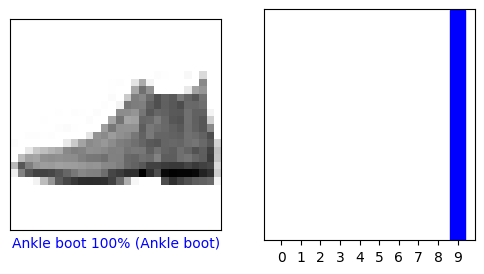

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

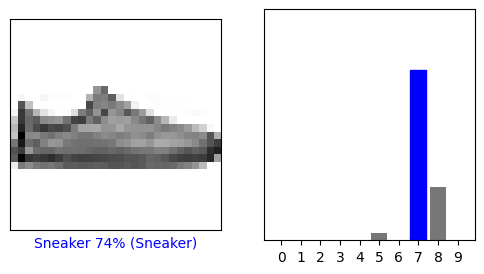

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

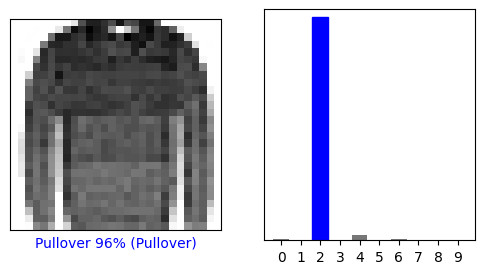

In [25]:
i = 20   #nueva
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

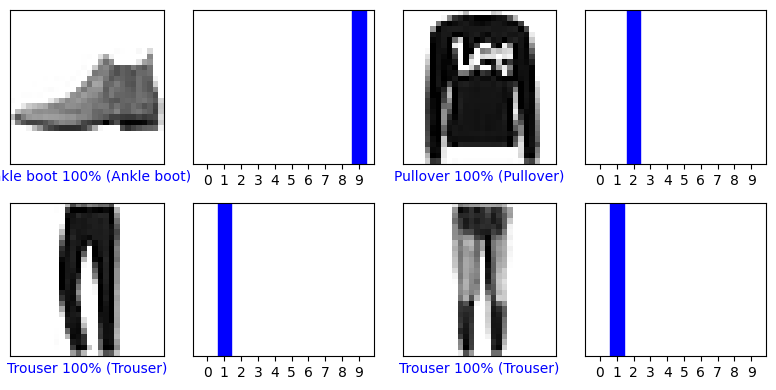

In [26]:
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[2.1044498e-04 3.8844491e-14 9.9902523e-01 5.1583537e-10 7.6104206e-04
  1.6329243e-16 3.3345930e-06 8.1034595e-21 2.0740748e-10 1.0085333e-14]]


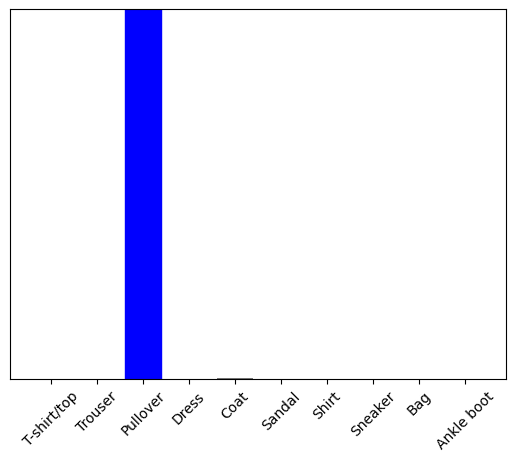

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

2